In [1]:
from telluric import GeoRaster2

In [2]:
rs1 = GeoRaster2.open("../tests/data/raster/overlap1.tif")
rs2 = GeoRaster2.open("../tests/data/raster/overlap2.tif")

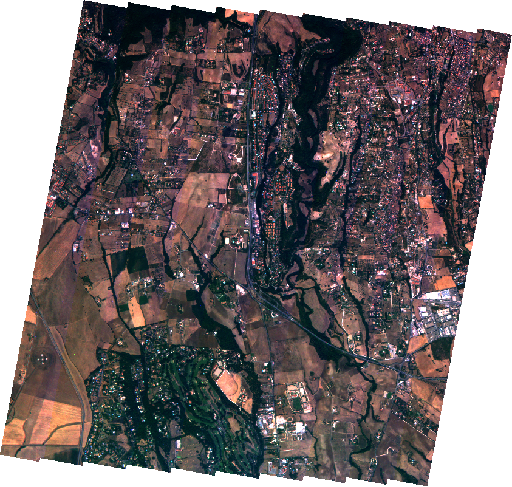

In [3]:
rs1

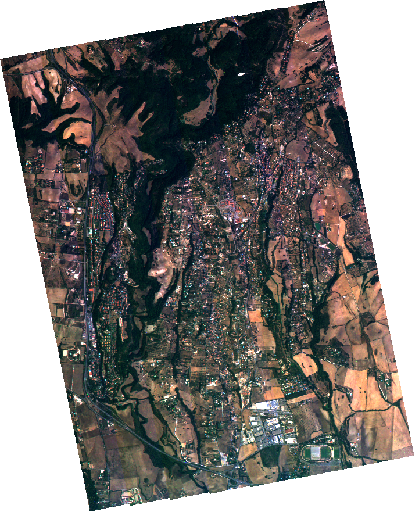

In [4]:
rs2

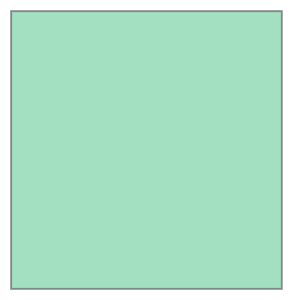

In [5]:
from shapely.geometry import Polygon

from telluric.constants import WEB_MERCATOR_CRS
from telluric import GeoVector

roi = GeoVector(
    Polygon.from_bounds(1375786, 5166840, 1382728, 5173963),
    WEB_MERCATOR_CRS
)

roi

In [6]:
from telluric.georaster import merge, merge_all, MergeStrategy

/home/juanlu/Development/telluric/telluric/georaster.py:554: GeoRaster2Warning: Negative indices are not supported and were rounded to zero
  warnings.warn("Negative indices are not supported and were rounded to zero", GeoRaster2Warning)


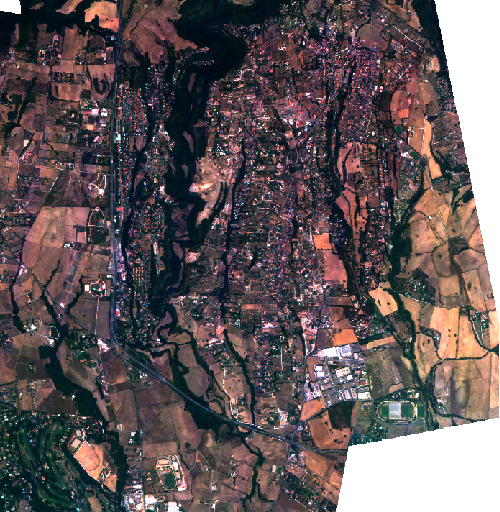

In [7]:
merged_all = merge_all([rs1, rs2], roi, merge_strategy=MergeStrategy.INTERSECTION)
merged_all

In [8]:
merged_all.resolution()

10.0

/home/juanlu/Development/telluric/telluric/georaster.py:554: GeoRaster2Warning: Negative indices are not supported and were rounded to zero
  warnings.warn("Negative indices are not supported and were rounded to zero", GeoRaster2Warning)


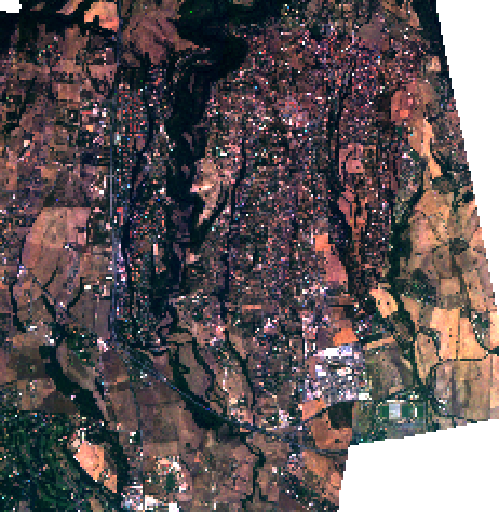

In [9]:
merged_all_30 = merge_all([rs1, rs2], roi, dest_resolution=30.0, merge_strategy=MergeStrategy.INTERSECTION)
merged_all_30

In [10]:
merged_all_30.resolution()

30.0

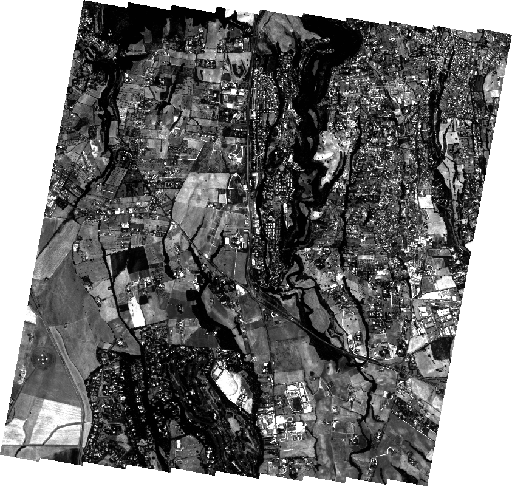

In [11]:
rs1_r = rs1.limit_to_bands(["red"])
rs1_gb = rs1.limit_to_bands(["green", "blue"])

rs1_r

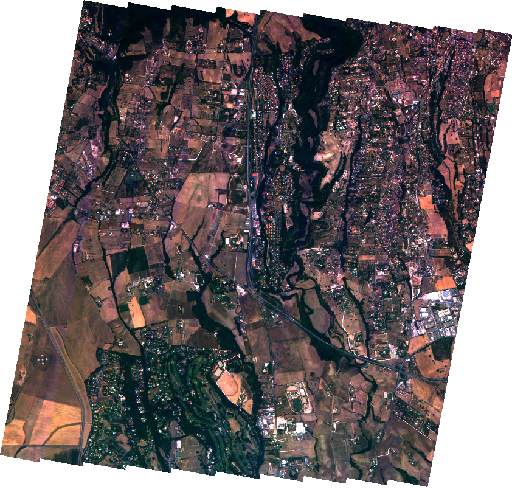

In [12]:
rs1_rgb = merge_all([rs1_r, rs1_gb], rs1_r.footprint(), merge_strategy=MergeStrategy.UNION)
rs1_rgb

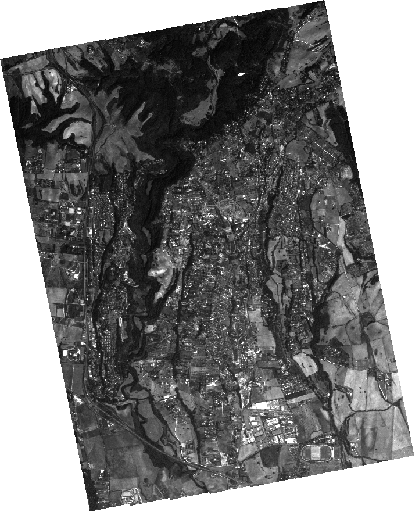

In [13]:
rs2_g = rs2.limit_to_bands(["green"])
rs2_g

In [14]:
rs_1r_2g = merge_all([rs1_r, rs2_g], roi, merge_strategy=MergeStrategy.UNION)
rs_1r_2g.save("rs_1r_2g.tif")

/home/juanlu/Development/telluric/telluric/georaster.py:554: GeoRaster2Warning: Negative indices are not supported and were rounded to zero
  warnings.warn("Negative indices are not supported and were rounded to zero", GeoRaster2Warning)


![Screenshot](screenshot.png)